In [2]:
import pandas as pd

### Importing the Dataset

In [3]:
df = pd.read_csv('MOTM Youth GU (0108).csv')

df.head()

,funder,fund,nature,quantum ($),reimbursement (type),processing time (mth),descriptor,weblink,image,causes,Unnamed: 10
0,Health Promotion Board,HPB - Our Healthy Singapore Fund,Government,"20,000",Reimbursement,3,Our Healthy Singapore Fund is initiated to pro...,https://oursggrants.gov.sg/grants/hpbohsf/inst...,https://public.flourish.studio/uploads/1409725...,Community Engagement; Mental Well-being,NaN
1,Housing Development Board,HDB - Lively Places Grant - Building Fund,Government,"20,000",Reimbursement,4,The Lively Places Building Fund encourages res...,https://www.hdb.gov.sg/cs/infoweb/community/ge...,https://public.flourish.studio/uploads/1409725...,Community Engagement,NaN
2,Housing Development Board,HDB - Lively Places Grant - Project Fund,Government,"5,000",Reimbursement,4,The Lively Places Project Fund encourages resi...,https://www.hdb.gov.sg/cs/infoweb/community/ge...,https://public.flourish.studio/uploads/1409725...,Community Engagement,NaN
3,Lee Kuan Yew Fund for Bilingualism,BL - Call for Proposals,Government,Undisclosed,Reimbursement,6,"Our MTL, heritage and culture forms an integra...",https://www.bilingualism.sg/about-us/about-the...,NaN,Arts & Heritage,NaN
4,Ministry of Sustainability and the Environment,MSE - SG ECO Fund,Government,"10,000",Reimbursement,3,The SG Eco Fund aims to support projects that ...,https://www.mse.gov.sg/sgecofund/about,https://public.flourish.studio/uploads/1409725...,Sustainability & Environment,NaN


### Replacing 'Undisclosed' with '0' in The Columns Quantum and Processing Time

In [4]:
# Assuming your DataFrame is named 'df'
df['quantum ($)'] = df['quantum ($)'].replace('Undisclosed', '0')

# Remove commas from the 'quantum ($)' column
df['quantum ($)'] = df['quantum ($)'].str.replace(',', '')

# Convert the 'quantum ($)' column to a numeric data type (integer or float)
df['quantum ($)'] = pd.to_numeric(df['quantum ($)'])

In [5]:
# Assuming your DataFrame is named 'df'
df['processing time (mth)'] = df['processing time (mth)'].replace('Undisclosed', '0')

# Remove commas from the 'quantum ($)' column
df['processing time (mth)'] = df['processing time (mth)'].str.replace(',', '')

# Convert the 'quantum ($)' column to a numeric data type (integer or float)
df['processing time (mth)'] = pd.to_numeric(df['processing time (mth)'])

### Removing Unwanted Columns

In [6]:
df.drop(columns=['Unnamed: 10'], inplace=True)

In [7]:
# List of columns to drop
columns_to_drop = ['weblink', 'image']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


### Text Pre-Processing 

In [8]:
import re

def preprocess_text(text):
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    return text

df['funder'] = df['funder'].apply(preprocess_text)
df['fund'] = df['fund'].apply(preprocess_text)
df['descriptor'] = df['descriptor'].apply(preprocess_text)
# df['causes'] = df['causes'].apply(preprocess_text)


df.head()

,funder,fund,nature,quantum ($),reimbursement (type),processing time (mth),descriptor,causes
0,health promotion board,hpb our healthy singapore fund,Government,20000,Reimbursement,3.0,our healthy singapore fund is initiated to pro...,Community Engagement; Mental Well-being
1,housing development board,hdb lively places grant building fund,Government,20000,Reimbursement,4.0,the lively places building fund encourages res...,Community Engagement
2,housing development board,hdb lively places grant project fund,Government,5000,Reimbursement,4.0,the lively places project fund encourages resi...,Community Engagement
3,lee kuan yew fund for bilingualism,bl call for proposals,Government,0,Reimbursement,6.0,our mtl heritage and culture forms an integral...,Arts & Heritage
4,ministry of sustainability and the environment,mse sg eco fund,Government,10000,Reimbursement,3.0,the sg eco fund aims to support projects that ...,Sustainability & Environment


In [9]:
# Remove records with missing or improperly formatted values
df = df.dropna(subset=['funder', 'fund', 'descriptor', 'causes'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_13712\40574782.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['funder'] = df['funder'].str.replace(r'[^\w\s]', '').str.strip().str.lower()
C:\Users\Acer\AppData\Local\Temp\ipykernel_13712\40574782.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fund'] = df['fund'].str.replace(r'[^\w\s]', '').str.strip().str.lower()
C:\Users\Acer\AppData\Local\Temp\ipykernel_13712\40574782.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['descriptor'] = df['descriptor'].str.replace(r'[^\w\s]', '').str.strip().str.lower()


### Data Understanding

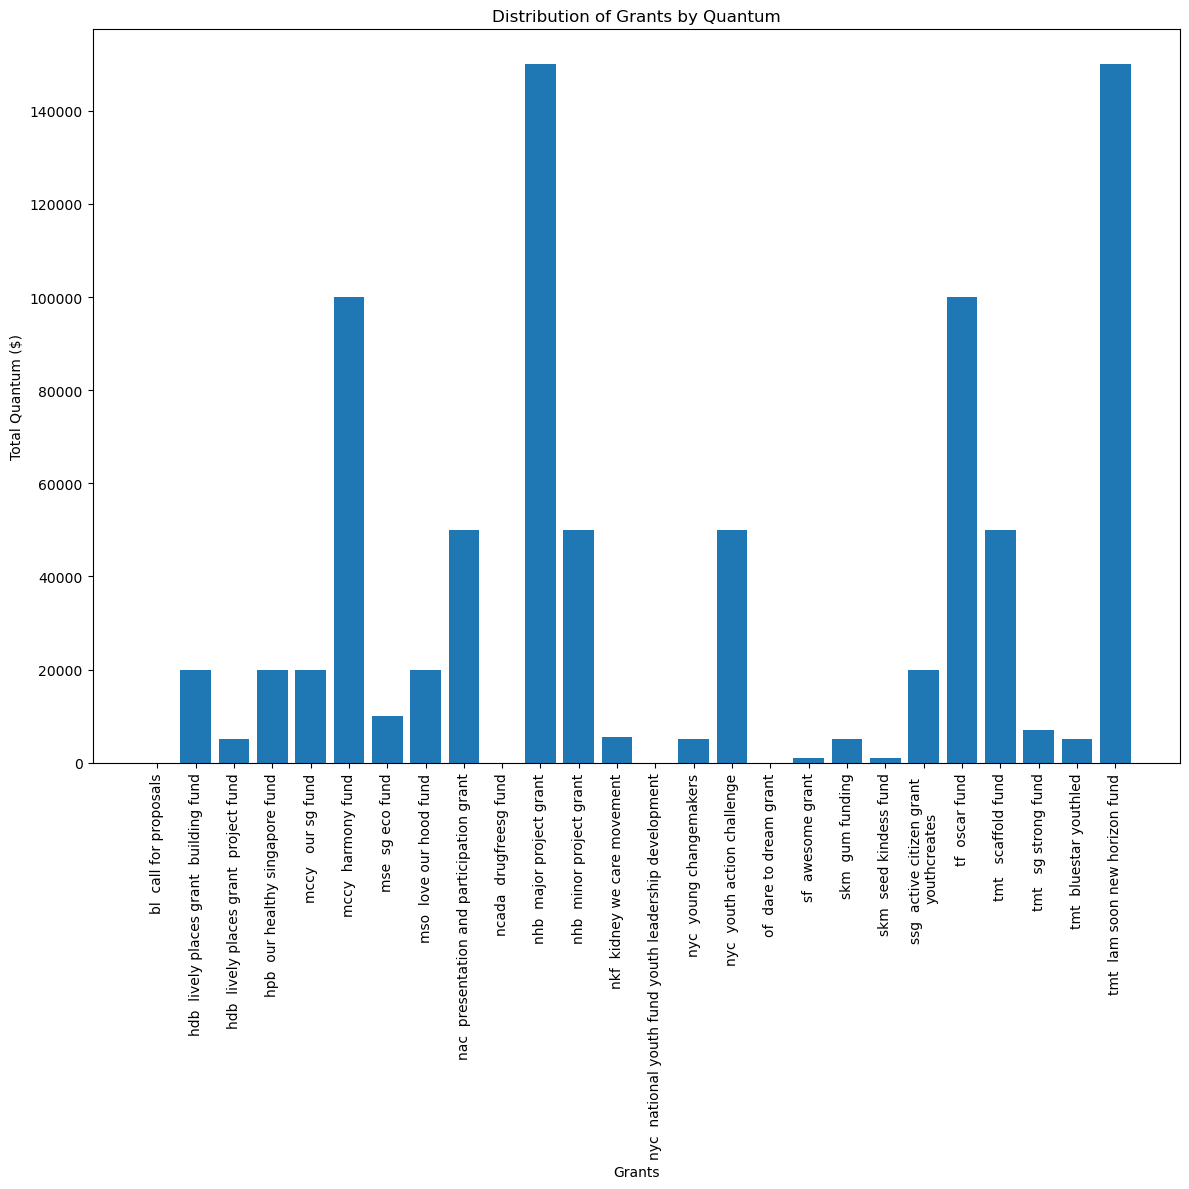

In [15]:
import matplotlib.pyplot as plt

quantum_distribution = df.groupby('fund')['quantum ($)'].sum().reset_index()

plt.figure(figsize=(12, 12))
plt.bar(quantum_distribution['fund'], quantum_distribution['quantum ($)'])
plt.xticks(rotation=90)
plt.xlabel('Grants')
plt.ylabel('Total Quantum ($)')
plt.title('Distribution of Grants by Quantum')
plt.tight_layout()
plt.show()


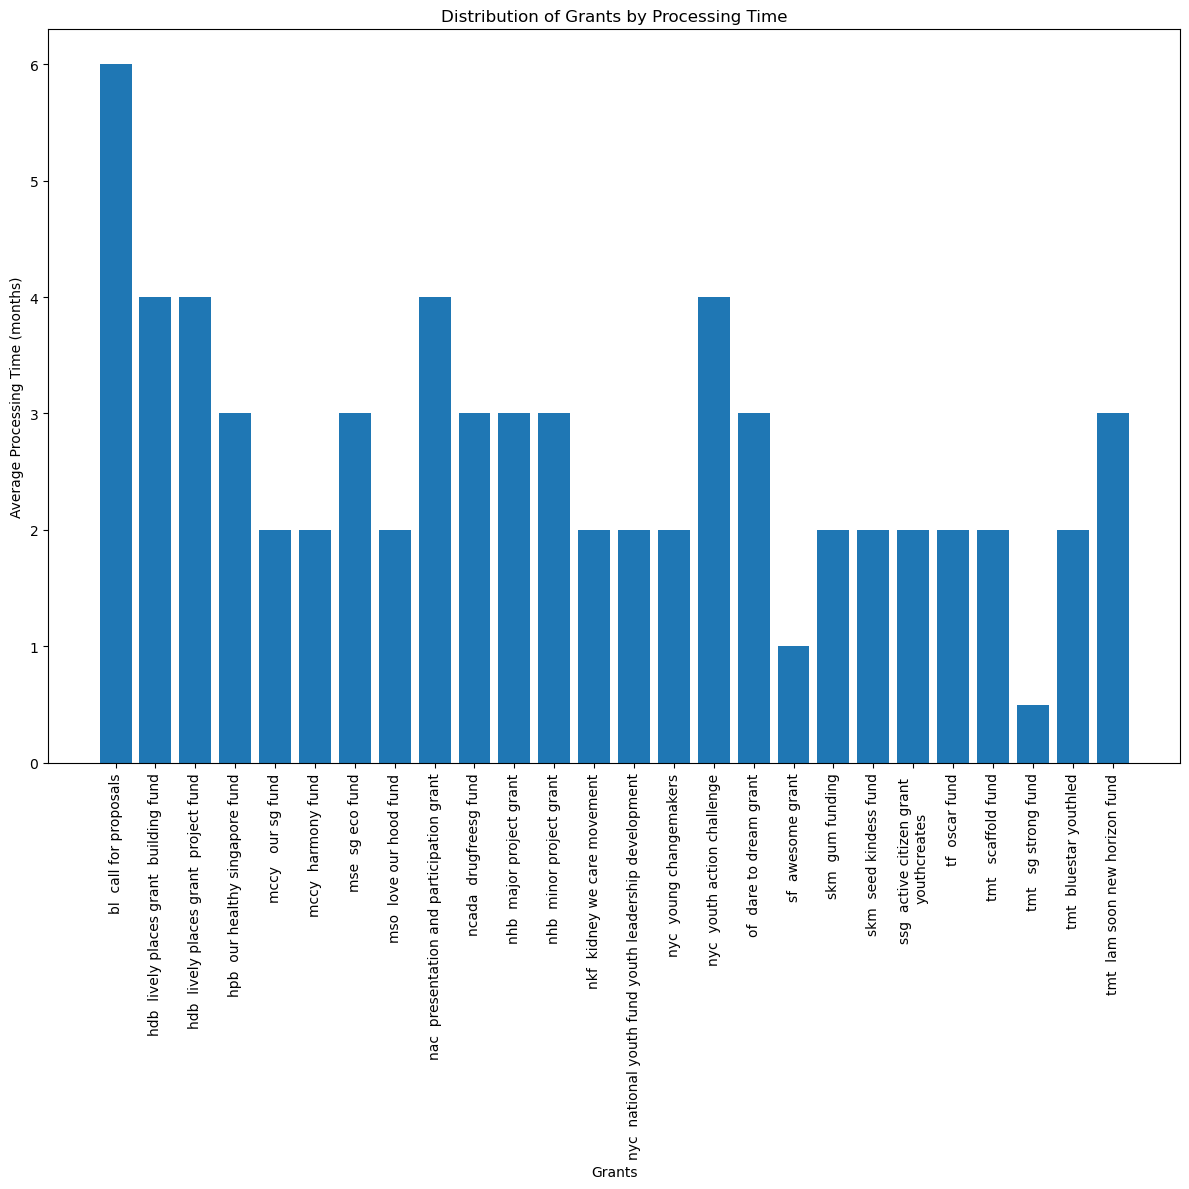

In [16]:
# 2. Distribution of Grants by Processing Time
processing_time_distribution = df.groupby('fund')['processing time (mth)'].mean().reset_index()

plt.figure(figsize=(12,12))
plt.bar(processing_time_distribution['fund'], processing_time_distribution['processing time (mth)'])
plt.xticks(rotation=90)
plt.xlabel('Grants')
plt.ylabel('Average Processing Time (months)')
plt.title('Distribution of Grants by Processing Time')
plt.tight_layout()
plt.show()

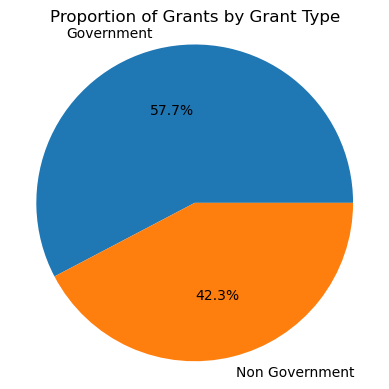

In [17]:
# 3. Proportion of Grants by Grant Type
grant_type_proportion = df['nature'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(grant_type_proportion, labels=grant_type_proportion.index, autopct='%1.1f%%')
plt.title('Proportion of Grants by Grant Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

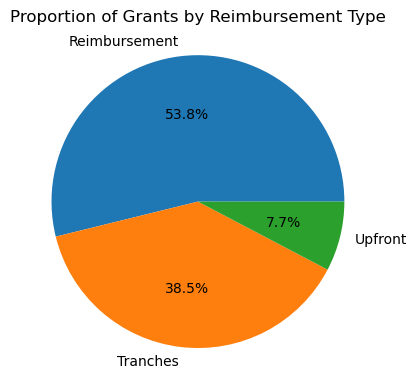

In [18]:
# 4. Proportion of Grants by Reimbursement Type
reimbursement_proportion = df['reimbursement (type)'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(reimbursement_proportion, labels=reimbursement_proportion.index, autopct='%1.1f%%')
plt.title('Proportion of Grants by Reimbursement Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

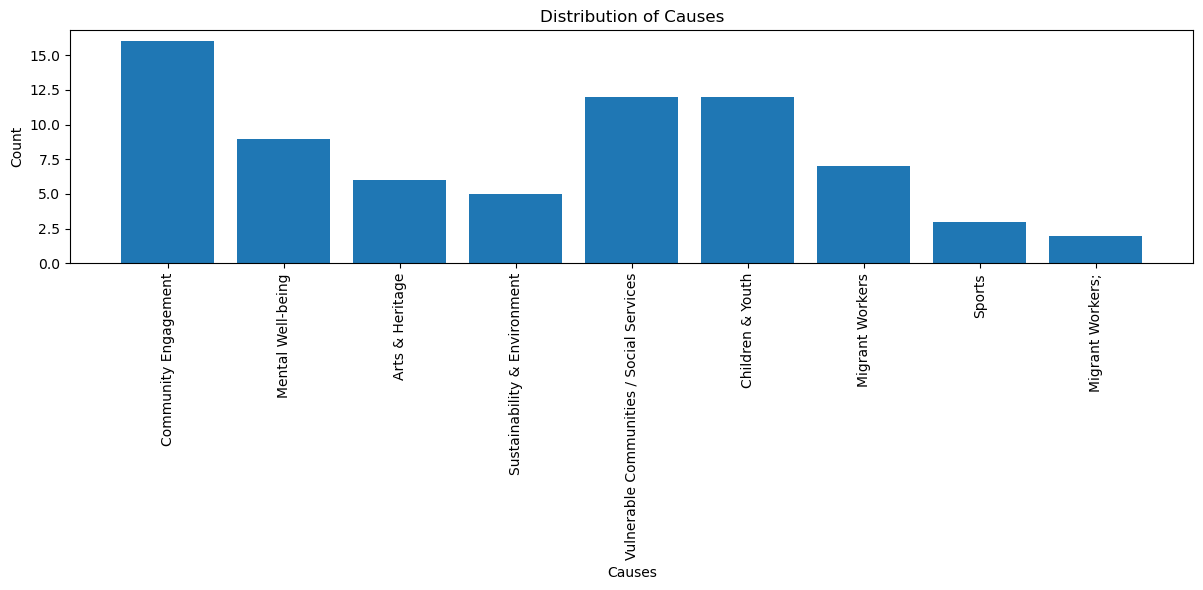

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(cause_df['cause'], cause_df['count'])
plt.xlabel('Causes')
plt.ylabel('Count')
plt.title('Distribution of Causes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
import csv

# Define the CSV file name
csv_file = 'National_Youth_Council.csv'

df.to_csv(csv_file, index=False)

print(f'Data written to {csv_file}')

Data written to National_Youth_Council.csv


In [22]:
df.head()

,funder,fund,nature,quantum ($),reimbursement (type),processing time (mth),descriptor,causes
0,health promotion board,hpb our healthy singapore fund,Government,20000,Reimbursement,3.0,our healthy singapore fund is initiated to pro...,"[Community Engagement, Mental Well-being]"
1,housing development board,hdb lively places grant building fund,Government,20000,Reimbursement,4.0,the lively places building fund encourages res...,[Community Engagement]
2,housing development board,hdb lively places grant project fund,Government,5000,Reimbursement,4.0,the lively places project fund encourages resi...,[Community Engagement]
3,lee kuan yew fund for bilingualism,bl call for proposals,Government,0,Reimbursement,6.0,our mtl heritage and culture forms an integral...,[Arts & Heritage]
4,ministry of sustainability and the environment,mse sg eco fund,Government,10000,Reimbursement,3.0,the sg eco fund aims to support projects that ...,[Sustainability & Environment]


### Separating the Causes from the dataset

In [23]:
import pandas as pd

# Original data with the "causes" column
data = {
    'causes': [
        'Community Engagement; Mental Well-being',
        'Community Engagement',
        'Community Engagement',
        'Arts & Heritage',
        'Sustainability & Environment',
        'Community Engagement',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Migrant Workers; Mental Well-being',
        'Community Engagement',
        'Arts & Heritage',
        'Community Engagement',
        'Arts & Heritage',
        'Arts & Heritage',
        'Vulnerable Communities / Social Services; Community Engagement; Sustainability & Environment; Children & Youth; Migrant Workers; Mental Well-being; Arts & Heritage; Sports',
        'Children & Youth',
        'Vulnerable Communities / Social Services; Community Engagement; Sustainability & Environment; Children & Youth; Migrant Workers; Mental Well-being; Arts & Heritage; Sports',
        'Vulnerable Communities / Social Services; Children & Youth',
        'Vulnerable Communities / Social Services; Community Engagement; Sustainability & Environment; Children & Youth; Migrant Workers; Mental Well-being',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Migrant Workers;',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Migrant Workers;',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Sports',
        'Vulnerable Communities / Social Services; Community Engagement; Sustainability & Environment; Children & Youth; Mental Well-being',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Migrant Workers; Mental Well-being',
        'Mental Well-being',
        'Migrant Workers',
        'Vulnerable Communities / Social Services; Community Engagement; Children & Youth; Migrant Workers; Mental Well-being',
        'Vulnerable Communities / Social Services'
    ]
}

# Split the "causes" column into separate rows
causes_list = []
for causes in data['causes']:
    causes_split = causes.split('; ')
    causes_list.extend(causes_split)

# Create a new DataFrame
new_data = {'causes': causes_list}
df = pd.DataFrame(new_data)


In [24]:
df

,causes
0,Community Engagement
1,Mental Well-being
2,Community Engagement
3,Community Engagement
4,Arts & Heritage
...,...
67,Community Engagement
68,Children & Youth
69,Migrant Workers
70,Mental Well-being


In [25]:

# Save the new dataset to a CSV file
df.to_csv('causes.csv', index=False)